In [1]:
import os
import pickle
import numpy as np
import itertools as it

from types import SimpleNamespace
from scipy.optimize import minimize

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as TB
import Modules.functions as func
import Modules.plot_functions as pf

In [2]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'

from IPython import display
from IPython.display import display_html
display_html(display.HTML(pf.nb_html_header))

Press this button to show/hide the code used in the notebook:

In [3]:
out_name = 'winding_mus_sqrtExsDeltas_Delta15meV_large_range'
with open(path + out_name + '.p', 'rb') as fp:
    phase_diagram = pickle.load(fp)
    mus = pickle.load(fp)
    Exs = pickle.load(fp)
    kxs = pickle.load(fp)
    p = pickle.load(fp)
    fixed_ky = pickle.load(fp)
    phase = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

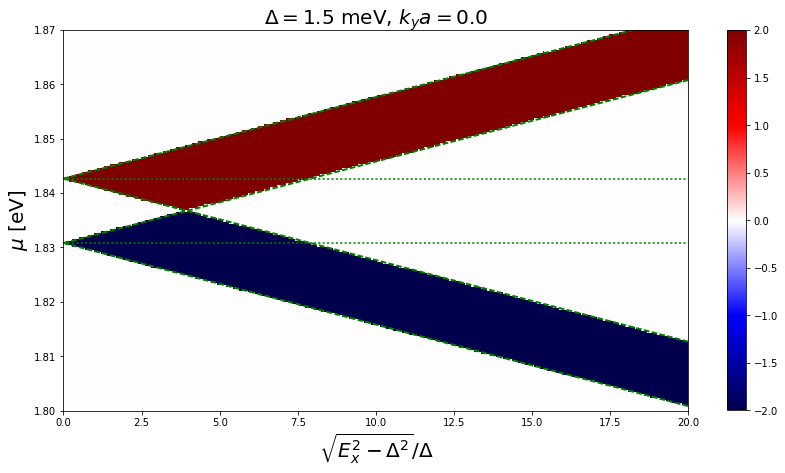

In [4]:
pf.plot_color_data(phase_diagram, sqrts/p.Delta, mus, figsize=(14, 7),
                   title=r'$\Delta = $'+str(1000*p.Delta)+' meV, $k_y a = $'+str(fixed_ky),
                   xlabel=r'$\sqrt{E_x^2-\Delta^2}/\Delta$', ylabel=r'$\mu$ [eV]',
                   pcolor=True, cmap='seismic', transpose=True)

# Boundaries, crossings with y axis
mu1 = 1.8308033364213507
mu2 = 1.8426584871296261
plt.axhline(mu1, ls='dotted', c='g')
plt.axhline(mu2, ls='dotted', c='g')

plt.plot(sqrts/p.Delta, sqrts + mu1, 'g--', lw=2)
plt.plot(sqrts/p.Delta, -sqrts + mu1, 'g--', lw=2)

plt.plot(sqrts/p.Delta, sqrts + mu2, 'g--', lw=2)
plt.plot(sqrts/p.Delta, -sqrts + mu2, 'g--', lw=2)
plt.ylim(mus[0], mus[-1]);

# Dispersions for different $\mu$, at gap closings and where the topo gap is maximum, with $\sqrt{E_x^2 - \Delta^2} = 3$ meV.

In [13]:
p

namespace(Delta=0.0015, Ex=0.0033541019662496848, Ey=0.0, lambda_M=0.0836, lambda_X=0.0556, mu=1.845658487129626)

In [14]:
sqrt = p.Delta*2
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

In [15]:
sqrt

0.003

In [16]:
cmus = [mu1-sqrt, mu1+sqrt, mu2-sqrt, mu2+sqrt]

In [17]:
mus = [(cmus[0], mu1), (cmus[1], cmus[2]), (mu2, cmus[3])]

In [18]:
mus

[(1.8278033364213508, 1.8308033364213507),
 (1.8338033364213506, 1.8396584871296262),
 (1.842658487129626, 1.845658487129626)]

In [19]:
p

namespace(Delta=0.0015, Ex=0.0033541019662496848, Ey=0.0, lambda_M=0.0836, lambda_X=0.0556, mu=1.845658487129626)

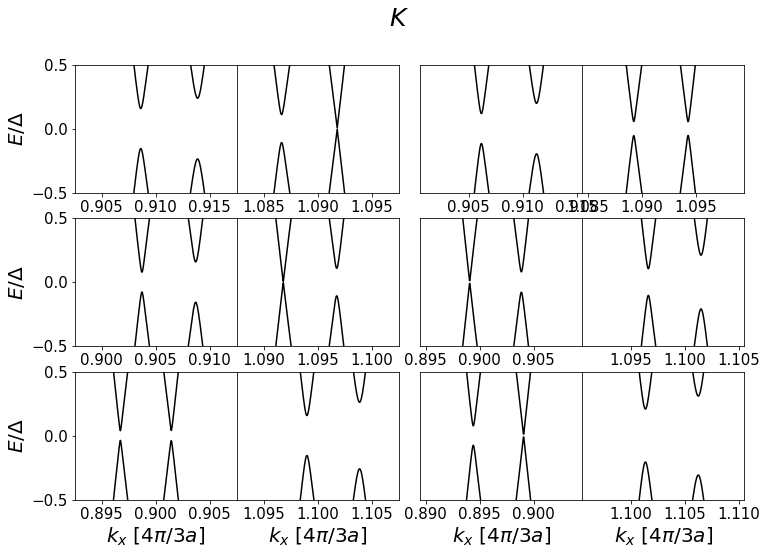

In [20]:
pf.topo_disp_mu(p, nKpoints=500, xticksL = None, mus=mus, ylims=[(-0.5, 0.5), (-0.5, 0.5), (-0.5, 0.5)],
             xticksR = None, wkx = 0.0075, kx_centers = [(0.91, 0.908), (0.905, 0.902), (0.9, 0.897)])